In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
from sklearn.metrics import mean_squared_error
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
superstore_data = pd.read_csv("/Users/theranmeadows/Desktop/Bellevue University/dsc630predictiveAnalytics/project/Walmart_Sales - Walmart.csv")
superstore_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# check for null values
superstore_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
all_cats = superstore_data[['Date', 'Weekly_Sales']]
all_cats.head()

,Date,Weekly_Sales
0,2/5/2010,1643690.90
1,2/12/2010,1641957.44
2,2/19/2010,1611968.17
3,2/26/2010,1409727.59
4,3/5/2010,1554806.68


In [5]:
all_cats['Date'] = pd.to_datetime(all_cats['Date'])

In [7]:
all_cats_clean = all_cats[['Date', 'Weekly_Sales']].sort_values('Date')
all_cats_clean = all_cats_clean.dropna()
all_cats_index = pd.DatetimeIndex(all_cats_clean['Date'].values)
all_cats_clean = all_cats_clean.set_index(all_cats_index)
all_cats_clean.drop('Date', axis=1, inplace=True)
all_cats_clean

,Weekly_Sales
2010-02-05,1643690.90
2010-02-05,2193048.75
2010-02-05,536006.73
2010-02-05,789036.02
2010-02-05,465108.52
...,...
2012-10-26,688940.94
2012-10-26,319550.77
2012-10-26,921264.52
2012-10-26,1127516.25


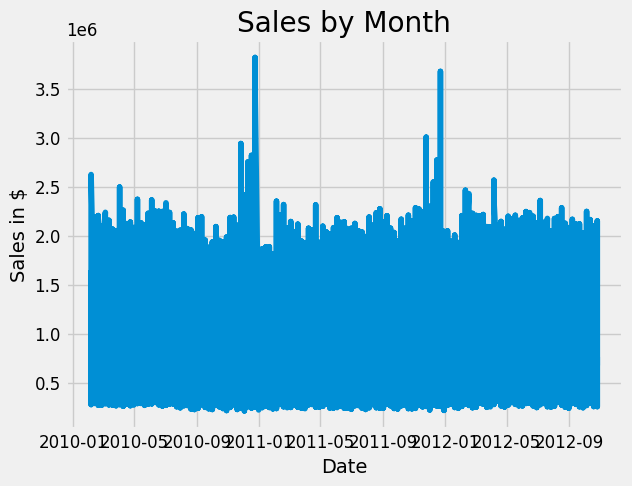

In [11]:
plt.plot(all_cats_clean['Weekly_Sales'])
plt.title('Sales by Month')
plt.xlabel('Date')
plt.ylabel('Sales in $')
plt.show()

In [12]:
train = all_cats_clean[all_cats_clean.index < '2012-01-01']
test = all_cats_clean[all_cats_clean.index >= '2012-01-02']

In [16]:
train

,Weekly_Sales
2010-02-05,1643690.90
2010-02-05,2193048.75
2010-02-05,536006.73
2010-02-05,789036.02
2010-02-05,465108.52
...,...
2011-12-30,454412.28
2011-12-30,1914148.89
2011-12-30,410553.88
2011-12-30,603460.79


In [14]:
test

,Weekly_Sales
2012-01-06,977286.07
2012-01-06,954576.86
2012-01-06,558343.57
2012-01-06,945823.65
2012-01-06,1150662.55
...,...
2012-10-26,688940.94
2012-10-26,319550.77
2012-10-26,921264.52
2012-10-26,1127516.25


In [19]:
time_model = AutoReg(train,lags=5).fit()

In [20]:
print(time_model.summary())

                            AutoReg Model Results                             
Dep. Variable:           Weekly_Sales   No. Observations:                 4500
Model:                     AutoReg(5)   Log Likelihood              -65978.251
Method:               Conditional MLE   S.D. of innovations         573322.794
Date:                Sat, 02 Mar 2024   AIC                         131970.503
Time:                        01:11:47   BIC                         132015.378
Sample:                             5   HQIC                        131986.316
                                 4500                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             8.87e+05   3.31e+04     26.796      0.000    8.22e+05    9.52e+05
Weekly_Sales.L1     0.0466      0.015      3.123      0.002       0.017       0.076
Weekly_Sales.L2     0.0368      

In [21]:
time_pred = time_model.predict(start = len(train), end = (len(all_cats_clean)-1),dynamic = False)

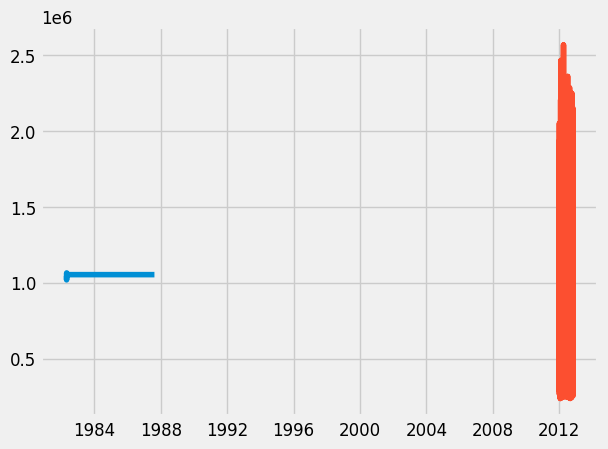

In [22]:
plt.plot(time_pred)
plt.plot(test)

In [23]:
rmse = sqrt(mean_squared_error(test, time_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 536853.395
